# Hinf Analysis and Synthesis

In [1]:
%reset -f

# Python Control Systems Library
# https://python-control.readthedocs.io/en/latest/index.html

from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://www.dropbox.com/s/3aoexl8vxyitmds/basic_material.py?dl=0
%run basic_material

try:
    import control
except ModuleNotFoundError:
    print("Could not find control - installing")
    !pip install control

try:
    import slycot
except ModuleNotFoundError:
    print("Could not find slycot - installing")
    !pip install slycot

from control import tf, mixsyn, feedback, step_response
!pwd

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
from numpy import linalg as LA
r2d = 180/np.pi

Running Python: 3.10.8
/home/jovyan/work


# Example on 26-10

## Easy case

In [50]:
s = tf([1, 0], 1)
# the plant
g = 100*(s+1)/(s**2+5*s+25) # notes

# first design
# sensitivity weighting
ws1 = 4.25*(s + 10) / (10*s + 1)
# T weighting
wu = tf(1/100,1)
wt1 = 3.5*(s + 2) / (s + 20)
k1, cl1, info1 = mixsyn(g, w1=ws1, w2=wu, w3=wt1) # added wu
print(f'First design gamma = {info1[0]:3.2f}')

# sensitivity (S) and complementary sensitivity (T) functions for
# design 1
s1 = feedback(1, g*k1)
t1 = feedback(g*k1, 1)

First design gamma = 0.83


In [51]:
# frequency response
omega = np.logspace(-2, 6, 1001)
ws1mag, _, _ = ws1.frequency_response(omega)
wt1mag, _, _ = wt1.frequency_response(omega)
s1mag, _, _ = s1.frequency_response(omega)
t1mag, _, _ = t1.frequency_response(omega)
gmag, _, _ = g.frequency_response(omega)
k1mag, _, _ = k1.frequency_response(omega)

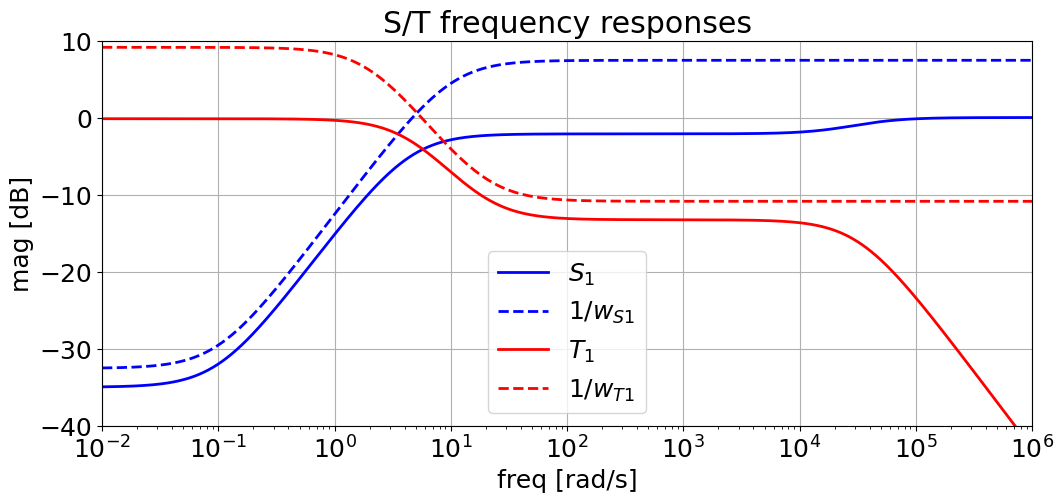

In [52]:
plt.figure(1,figsize=(12,5))
# text uses log-scaled absolute, but dB are probably more familiar to most control engineers
plt.semilogx(omega, 20*np.log10(s1mag.flat), 'b', label='$S_1$')
plt.semilogx(omega, -20*np.log10(ws1mag.flat), 'b--', label='$1/w_{S1}$')
plt.semilogx(omega, 20*np.log10(t1mag.flat), 'r', label='$T_1$')
plt.semilogx(omega, -20*np.log10(wt1mag.flat), 'r--', label='$1/w_{T1}$')

plt.ylim([-40, 10])
plt.xlim([1e-2, 1e6])
plt.xlabel('freq [rad/s]')
plt.ylabel('mag [dB]')
plt.legend()
plt.title('S/T frequency responses')
plt.show()

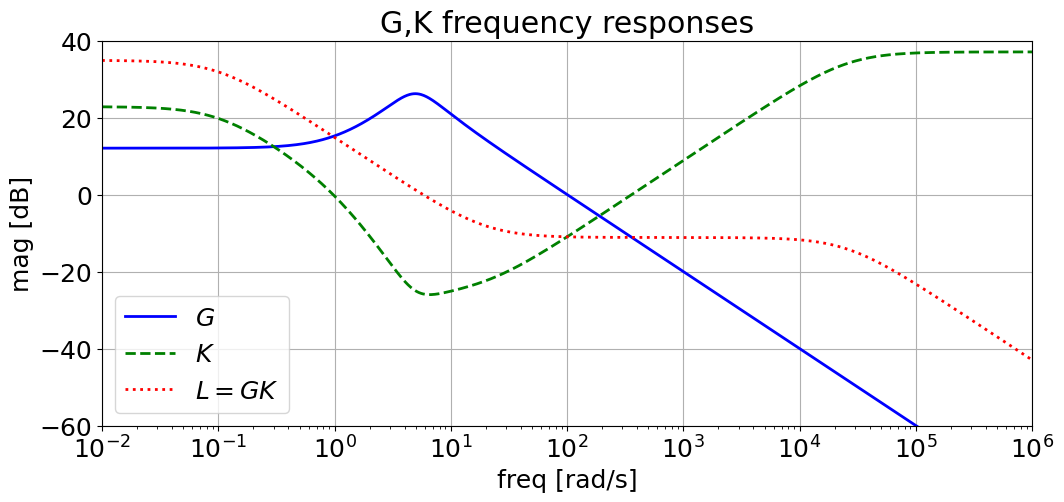

In [53]:
plt.figure(1,figsize=(12,5))
# text uses log-scaled absolute, but dB are probably more familiar to most control engineers
plt.semilogx(omega, 20*np.log10(gmag.flat), 'b', label='$G$')
plt.semilogx(omega, 20*np.log10(k1mag.flat), 'g--', label='$K$')
plt.semilogx(omega, 20*np.log10(gmag*k1mag.flat), 'r:', label='$L=GK$')

plt.ylim([-60, 40])
plt.xlim([1e-2, 1e6])
plt.xlabel('freq [rad/s]')
plt.ylabel('mag [dB]')
plt.legend()
plt.title('G,K frequency responses')
plt.show()

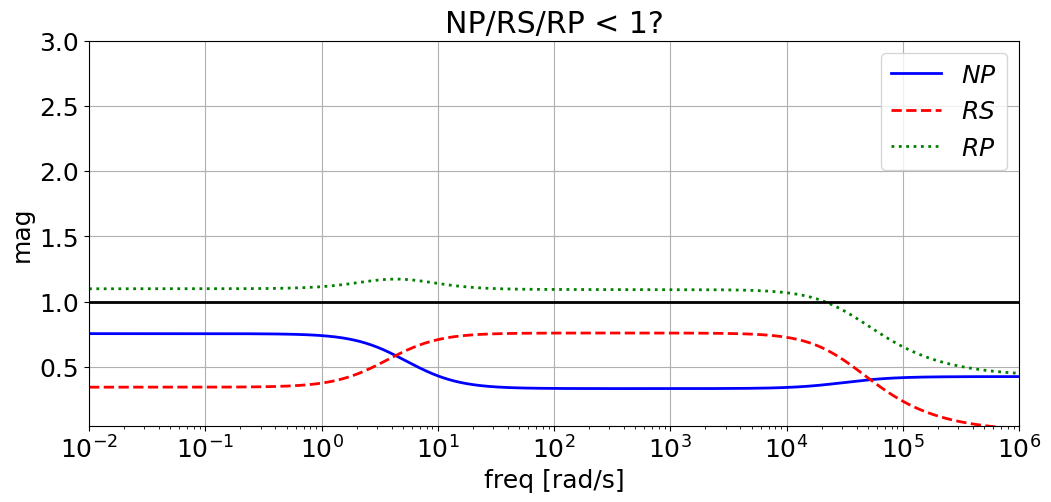

In [43]:
plt.figure(1,figsize=(12,5))
# text uses log-scaled absolute, but dB are probably more familiar to most control engineers
plt.semilogx(omega, (s1mag*ws1mag.flat), 'b', label='$NP$')
plt.semilogx(omega, (t1mag*wt1mag.flat), 'r--', label='$RS$')
plt.semilogx(omega, (s1mag*ws1mag.flat)+(t1mag*wt1mag.flat), 'g:', label='$RP$')
plt.semilogx([omega[0],omega[-1]], ([1, 1]), 'k-')

plt.ylim([5e-2, 3])
plt.xlim([1e-2, 1e6])
plt.xlabel('freq [rad/s]')
plt.ylabel('mag')
plt.legend()
plt.title('NP/RS/RP < 1?')
plt.show()

## Hard case

In [49]:
s = tf([1, 0], 1)
# the plant
g = 100*(s+1)/(s**2-2*.5*5*s+25) # code

# first design
# sensitivity weighting
ws1 = 4.25*(s + 10) / (10*s + 1)
# T weighting
wu = tf(1/100,1)
wt1 = 3.5*(s + 2) / (s + 20)
k1, cl1, info1 = mixsyn(g, w1=ws1, w2=wu, w3=wt1) # added wu
print(f'First design gamma = {info1[0]:3.2f}')

# sensitivity (S) and complementary sensitivity (T) functions for
# design 1
s1 = feedback(1, g*k1)
t1 = feedback(g*k1, 1)

First design gamma = 1.55


In [45]:
# frequency response
omega = np.logspace(-2, 6, 1001)
ws1mag, _, _ = ws1.frequency_response(omega)
wt1mag, _, _ = wt1.frequency_response(omega)
s1mag, _, _ = s1.frequency_response(omega)
t1mag, _, _ = t1.frequency_response(omega)
gmag, _, _ = g.frequency_response(omega)
k1mag, _, _ = k1.frequency_response(omega)

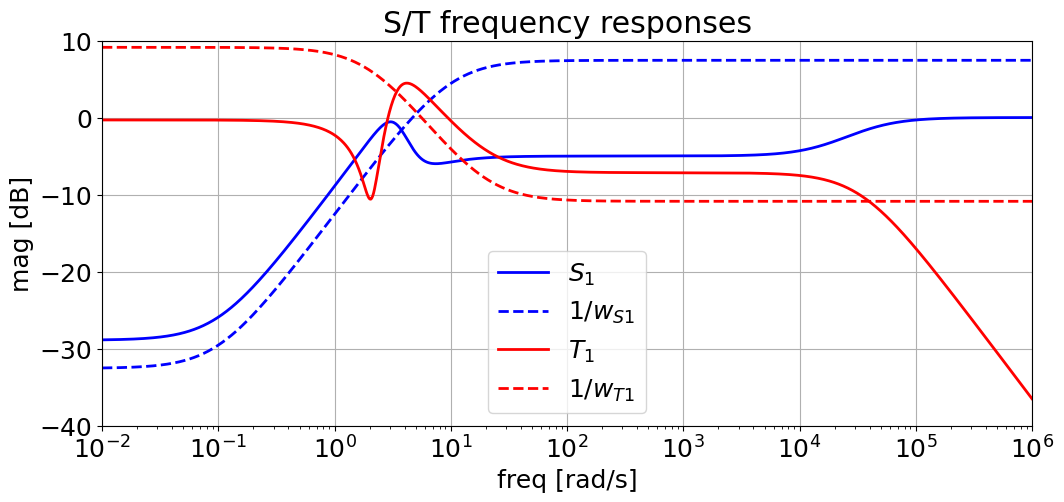

In [46]:
plt.figure(1,figsize=(12,5))
# text uses log-scaled absolute, but dB are probably more familiar to most control engineers
plt.semilogx(omega, 20*np.log10(s1mag.flat), 'b', label='$S_1$')
plt.semilogx(omega, -20*np.log10(ws1mag.flat), 'b--', label='$1/w_{S1}$')
plt.semilogx(omega, 20*np.log10(t1mag.flat), 'r', label='$T_1$')
plt.semilogx(omega, -20*np.log10(wt1mag.flat), 'r--', label='$1/w_{T1}$')

plt.ylim([-40, 10])
plt.xlim([1e-2, 1e6])
plt.xlabel('freq [rad/s]')
plt.ylabel('mag [dB]')
plt.legend()
plt.title('S/T frequency responses')
plt.show()

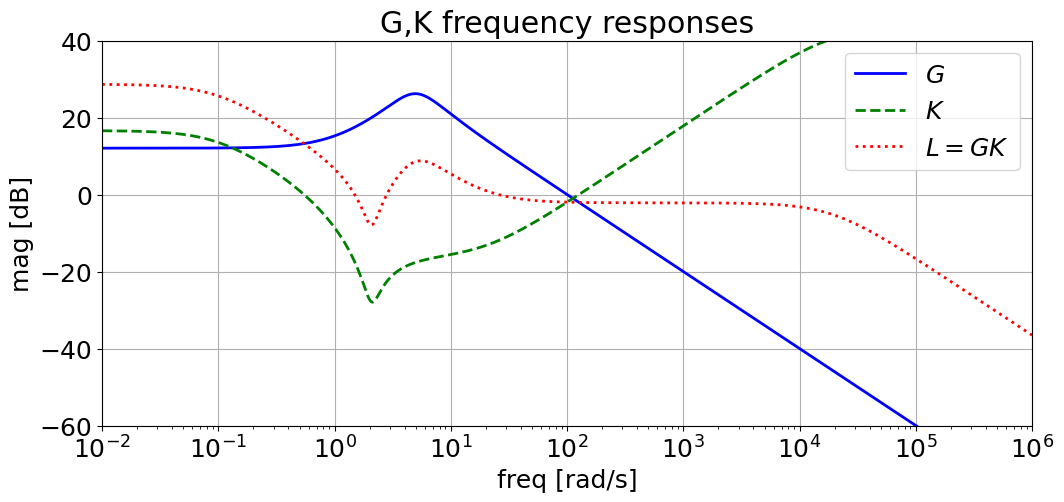

In [47]:
plt.figure(1,figsize=(12,5))
# text uses log-scaled absolute, but dB are probably more familiar to most control engineers
plt.semilogx(omega, 20*np.log10(gmag.flat), 'b', label='$G$')
plt.semilogx(omega, 20*np.log10(k1mag.flat), 'g--', label='$K$')
plt.semilogx(omega, 20*np.log10(gmag*k1mag.flat), 'r:', label='$L=GK$')

plt.ylim([-60, 40])
plt.xlim([1e-2, 1e6])
plt.xlabel('freq [rad/s]')
plt.ylabel('mag [dB]')
plt.legend()
plt.title('G,K frequency responses')
plt.show()

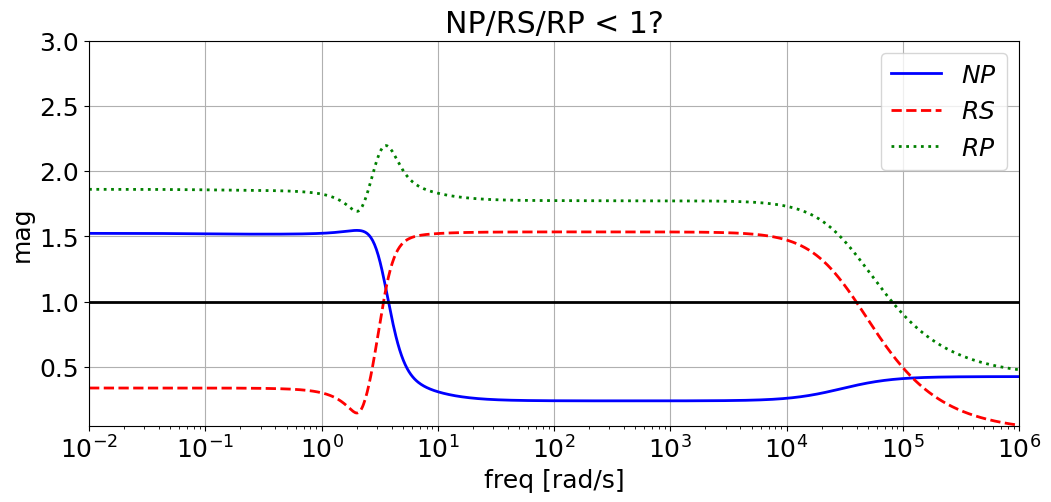

In [48]:
plt.figure(1,figsize=(12,5))
# text uses log-scaled absolute, but dB are probably more familiar to most control engineers
plt.semilogx(omega, (s1mag*ws1mag.flat), 'b', label='$NP$')
plt.semilogx(omega, (t1mag*wt1mag.flat), 'r--', label='$RS$')
plt.semilogx(omega, (s1mag*ws1mag.flat)+(t1mag*wt1mag.flat), 'g:', label='$RP$')
plt.semilogx([omega[0],omega[-1]], ([1, 1]), 'k-')

plt.ylim([5e-2, 3])
plt.xlim([1e-2, 1e6])
plt.xlabel('freq [rad/s]')
plt.ylabel('mag')
plt.legend()
plt.title('NP/RS/RP < 1?')
plt.show()